# Insurance Claims- Fraud Detection

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('frud.csv')

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
df.head(3)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN


In [8]:
df.shape

(1000, 40)

data contain 1000 rows and 40 columns

In [9]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

only null values present in the column _c39

In [10]:
df.drop("_c39",axis=1,inplace=True)

In [11]:
df.shape

(1000, 39)

In [12]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [14]:
df["incident_state"].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [15]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

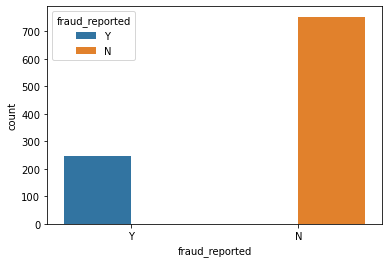

In [17]:
ax =sns.countplot(x ='fraud_reported', data = df, hue='fraud_reported')

data is imbalenced

In [18]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [19]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

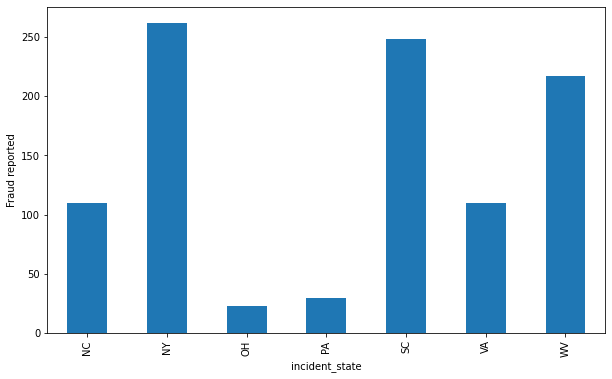

In [20]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

NY is most happend incident state

In [21]:
df.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

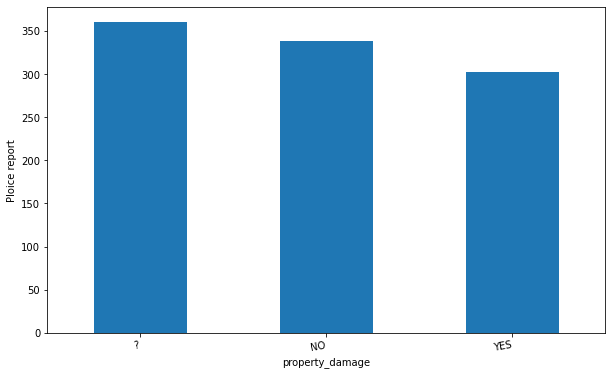

In [22]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Ploice report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

from the above report shows most cases dont have police report

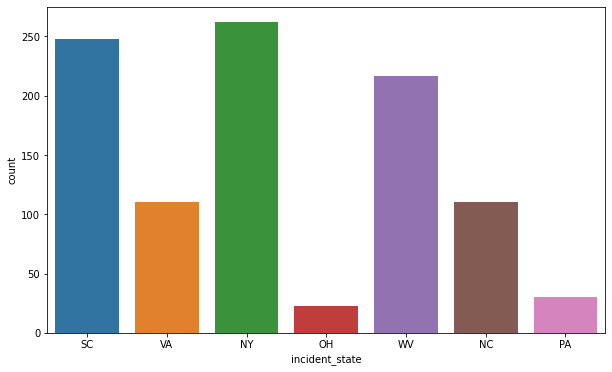

In [23]:
fig = plt.figure(figsize =(10,6))
ax = sns.countplot(x ='incident_state', data = df)

NY is most happend incident state

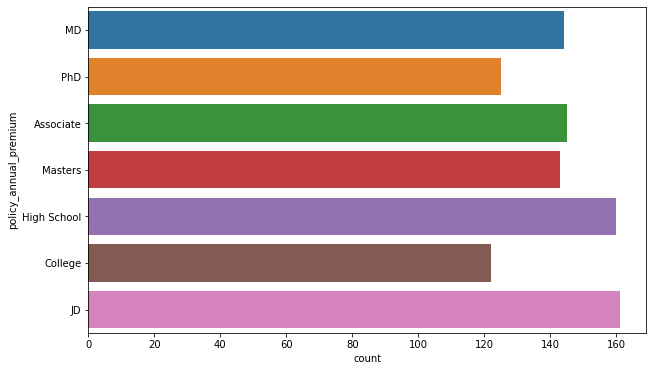

In [24]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y ='insured_education_level', data = df)
ax.set_ylabel('policy_annual_premium')
plt.show()

most claints have JD and highschool education

In [25]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

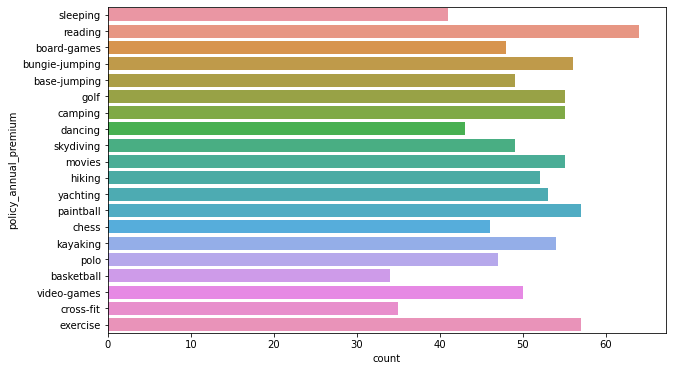

In [26]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y ='insured_hobbies', data = df)
ax.set_ylabel('policy_annual_premium')
plt.show()

most of the claints have hobbie of reading

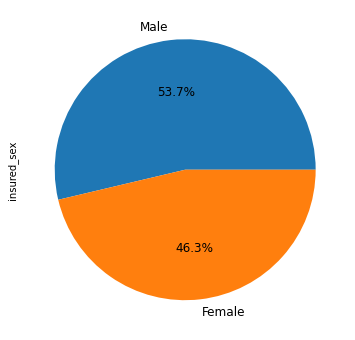

In [27]:
fig = plt.figure(figsize=(10,6))
ax = (df['insured_sex'].value_counts()*100.0/len(df))\
.plot.pie(autopct='%.1f%%', labels=['Male','Female'], fontsize=12)
plt.show()

more number of claints are male

In [28]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [29]:
df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [30]:
df['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

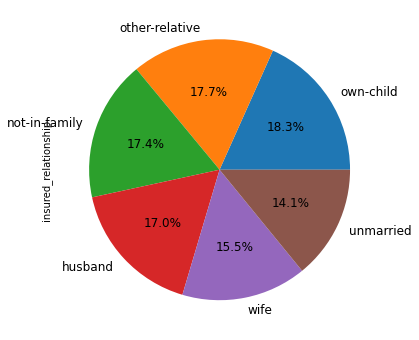

In [31]:
fig = plt.figure(figsize = (10,6))
ax = (df['insured_relationship'].value_counts()*100.0/len(df))\
.plot.pie(autopct='%.1f%%', labels = ['own-child','other-relative','not-in-family','husband','wife','unmarried'],fontsize=12)
plt.show()

the abone graph represnts the insured relationship more of them represent their own children

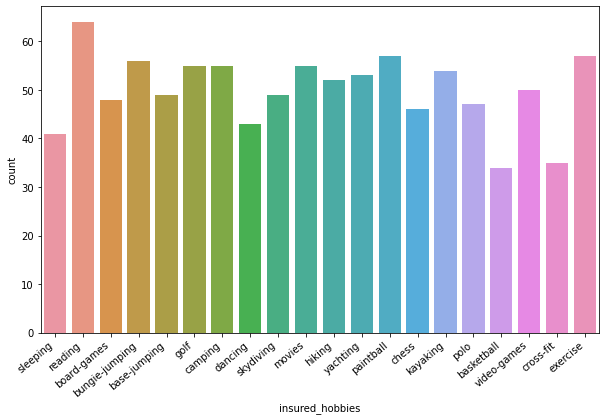

In [32]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies',data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

In [33]:
df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

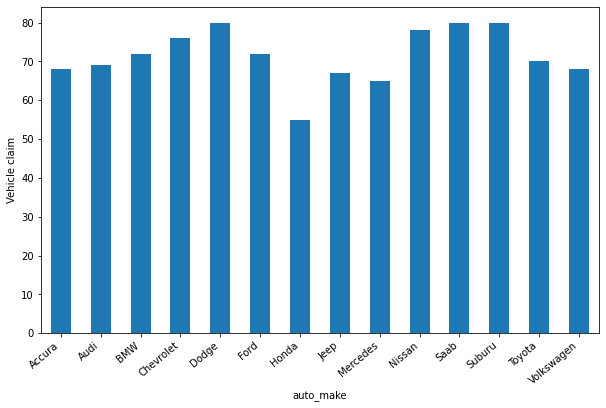

In [34]:
fig = plt.figure(figsize=(10,6))
ax= df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

all the auto make claim almost equal amount exept honda it claim less than the other

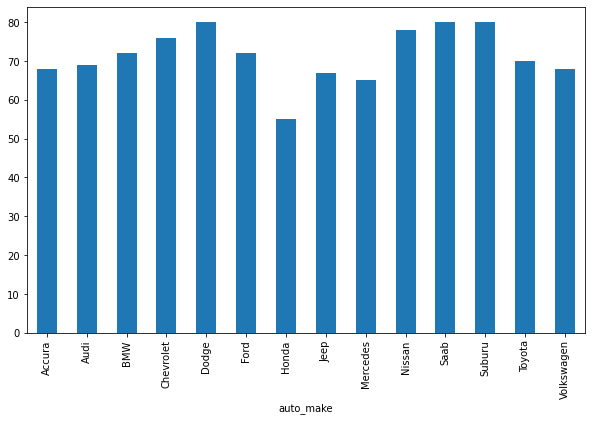

In [35]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('auto_make').vehicle_claim.count().plot.bar()
ax.set_xticklabels(ax.get_xticklabels());

In [36]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

# Data preprocessing

In [37]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [38]:
df['fraud_reported']=df['fraud_reported'].replace({'N':1,'Y':0})

In [39]:
df['vehicle_age'] = 2018 - df['auto_year'] # Deriving the age of the vehicle based on the year value 
df['vehicle_age'].head(10)

0    14
1    11
2    11
3     4
4     9
5    15
6     6
7     3
8     6
9    22
Name: vehicle_age, dtype: int64

In [40]:
df['vehicle_age'] = 2018-df['auto_year']


In [41]:
df['vehicle_age'].head(10)

0    14
1    11
2    11
3     4
4     9
5    15
6     6
7     3
8     6
9    22
Name: vehicle_age, dtype: int64

In [42]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [43]:
df['incident_hour_of_the_day' ]

0       5
1       8
2       7
3       5
4      20
       ..
995    20
996    23
997     4
998     2
999     6
Name: incident_hour_of_the_day, Length: 1000, dtype: int64

In [44]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]
name =["second_midnight", "first_morning","morning","after-morning","afternoon","evening","night"]
df['incident_time'] = pd.cut(df.incident_hour_of_the_day, bins, labels=name).astype(object)
df[['incident_hour_of_the_day','incident_time']].head(20)

,incident_hour_of_the_day,incident_time
0,5,first_morning
1,8,morning
2,7,morning
3,5,first_morning
4,20,evening
5,19,evening
6,0,second_midnight
7,23,night
8,21,night
9,14,afternoon


In [45]:
df = df.drop(columns =['policy_number','insured_zip','policy_bind_date','incident_date','incident_location','auto_year','incident_hour_of_the_day'])

In [46]:
df.head(2)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_time
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,0,14,first_morning
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,0,11,morning


In [47]:
df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [48]:
df.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [49]:
df.police_report_available.value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [50]:
df.head(2)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_time
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,0,14,first_morning
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,0,11,morning


In [51]:
from sklearn import preprocessing

In [52]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_time
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,0,14,first_morning
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,0,11,morning
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,1,11,morning
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,0,4,first_morning
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,1,9,evening


In [53]:
df.loc[df['collision_type']== '?']

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_time
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,0,11,morning
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,1,9,evening
13,121,34,OH,100/300,1000,936.61,0,FEMALE,MD,armed-forces,bungie-jumping,wife,52800,-32800,Parked Car,?,Minor Damage,None,SC,Springfield,1,NO,1,1,NO,7280,1120,1120,5040,Toyota,Highlander,1,8,first_morning
26,257,43,IN,100/300,2000,1322.10,0,MALE,High School,prof-specialty,golf,own-child,0,-29200,Parked Car,?,Minor Damage,Police,PA,Arlington,1,YES,1,3,YES,9020,1640,820,6560,Toyota,Camry,1,13,first_morning
27,202,34,IN,100/300,500,848.07,3000000,MALE,JD,exec-managerial,chess,not-in-family,31000,-30200,Vehicle Theft,?,Minor Damage,None,VA,Northbrook,1,YES,2,1,?,5720,1040,520,4160,Suburu,Forrestor,0,15,first_morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,163,37,IN,500/1000,1000,1200.33,4000000,FEMALE,High School,craft-repair,cross-fit,own-child,0,-36400,Vehicle Theft,?,Minor Damage,Police,WV,Springfield,1,?,2,1,YES,3900,390,780,2730,Volkswagen,Jetta,0,10,morning
969,398,55,OH,250/500,500,862.19,0,MALE,High School,adm-clerical,movies,unmarried,69400,0,Vehicle Theft,?,Trivial Damage,Police,SC,Northbend,1,?,2,3,?,6600,600,1200,4800,Accura,MDX,1,6,morning
983,17,39,IL,250/500,1000,840.95,0,FEMALE,JD,adm-clerical,hiking,unmarried,32500,-80800,Parked Car,?,Trivial Damage,Police,SC,Arlington,1,?,2,1,?,3440,430,430,2580,Suburu,Legacy,1,16,morning
994,141,30,IN,500/1000,1000,1347.04,0,MALE,High School,sales,bungie-jumping,own-child,0,-82100,Parked Car,?,Minor Damage,None,SC,Northbend,1,?,1,2,YES,6480,540,1080,4860,Honda,Civic,1,22,first_morning


In [54]:
df['collision_type']=df['collision_type'].replace("?",'unknown')#replacing ? with unknown

In [55]:
df['collision_type'].head()

0     Side Collision
1            unknown
2     Rear Collision
3    Front Collision
4            unknown
Name: collision_type, dtype: object

In [56]:
df['property_damage']=df['property_damage'].replace("?",'NO')#replacing ? with No

In [57]:
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [58]:
df['police_report_available']=df['police_report_available'].replace("?",'NO')# replacing ? with No

In [59]:
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

In [60]:
df['property_damage'] = df.property_damage.replace({"NO":0,"YES":1})#assigning the numerical values in Income column

In [61]:
df['property_damage'].value_counts()

0    698
1    302
Name: property_damage, dtype: int64

In [62]:
df['police_report_available'] = df.police_report_available.replace({"NO":0,"YES":1})#assigning numeric value to NO and YES

In [63]:
df['police_report_available'].value_counts()

0    686
1    314
Name: police_report_available, dtype: int64

In [64]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_time
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,1,1,2,1,71610,6510,13020,52080,Saab,92x,0,14,first_morning
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,unknown,Minor Damage,Police,VA,Riverwood,1,0,0,0,0,5070,780,780,3510,Mercedes,E400,0,11,morning
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,3,0,2,3,0,34650,7700,3850,23100,Dodge,RAM,1,11,morning
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,1,0,1,2,0,63400,6340,6340,50720,Chevrolet,Tahoe,0,4,first_morning
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,unknown,Minor Damage,None,NY,Arlington,1,0,0,1,0,6500,1300,650,4550,Accura,RSX,1,9,evening


In [65]:
df['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [66]:
df['policy_csl'] = df.policy_csl.replace({"250/500":0,"100/300":1,"500/1000":2})#replacing the values with 1,2 and 3

In [67]:
df.head(7)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_time
0,328,48,OH,0,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,1,1,2,1,71610,6510,13020,52080,Saab,92x,0,14,first_morning
1,228,42,IN,0,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,unknown,Minor Damage,Police,VA,Riverwood,1,0,0,0,0,5070,780,780,3510,Mercedes,E400,0,11,morning
2,134,29,OH,1,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,3,0,2,3,0,34650,7700,3850,23100,Dodge,RAM,1,11,morning
3,256,41,IL,0,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,1,0,1,2,0,63400,6340,6340,50720,Chevrolet,Tahoe,0,4,first_morning
4,228,44,IL,2,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,unknown,Minor Damage,None,NY,Arlington,1,0,0,1,0,6500,1300,650,4550,Accura,RSX,1,9,evening
5,256,39,OH,0,1000,1351.10,0,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,3,0,0,2,0,64100,6410,6410,51280,Saab,95,0,15,evening
6,137,34,IN,0,1000,1333.35,0,MALE,PhD,prof-specialty,board-games,husband,0,-77000,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,3,0,0,0,0,78650,21450,7150,50050,Nissan,Pathfinder,1,6,second_midnight


In [68]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [69]:
df['insured_sex'] = df.insured_sex.replace({"FEMALE":0,"MALE":1})# reassingning the values with 0 and 1

In [70]:
df['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [71]:
df['policy_state'] = df.policy_state.replace({"OH":0,"IL":1,"IN":2})

In [72]:
df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

### Encoding the categorical values

In [70]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [71]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [72]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_time
0,328,48,0,0,1000,1406.91,0,1,4.0,2.0,17.0,0.0,53300,0,2.0,2.0,0.0,4.0,4.0,1.0,1,1,1,2,1,71610,6510,13020,52080,10.0,1.0,0,14,3.0
1,228,42,2,0,2000,1197.22,5000000,1,4.0,6.0,15.0,2.0,0,0,3.0,3.0,1.0,4.0,5.0,5.0,1,0,0,0,0,5070,780,780,3510,8.0,12.0,0,11,4.0
2,134,29,0,1,2000,1413.14,5000000,0,6.0,11.0,2.0,3.0,35100,0,0.0,1.0,1.0,4.0,1.0,1.0,3,0,2,3,0,34650,7700,3850,23100,4.0,30.0,1,11,4.0
3,256,41,1,0,2000,1415.74,6000000,0,6.0,1.0,2.0,4.0,48900,-62400,2.0,0.0,0.0,4.0,2.0,0.0,1,0,1,2,0,63400,6340,6340,50720,3.0,34.0,0,4,3.0
4,228,44,1,2,1000,1583.91,6000000,1,0.0,11.0,2.0,4.0,66000,-46000,3.0,3.0,1.0,2.0,1.0,0.0,1,0,0,1,0,6500,1300,650,4550,0.0,31.0,1,9,2.0


In [73]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                     int64
policy_csl                       int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int64
insured_education_level        float64
insured_occupation             float64
insured_hobbies                float64
insured_relationship           float64
capital-gains                    int64
capital-loss                     int64
incident_type                  float64
collision_type                 float64
incident_severity              float64
authorities_contacted          float64
incident_state                 float64
incident_city                  float64
number_of_vehicles_involved      int64
property_damage                  int64
bodily_injuries                  int64
witnesses                        int64
police_report_available          int64
total_claim_amount       

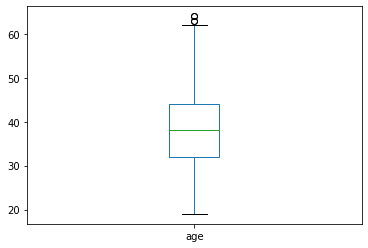

In [74]:
df['age'].plot.box()

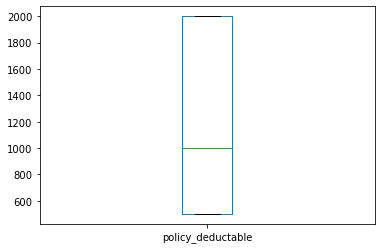

In [75]:
df['policy_deductable'].plot.box()

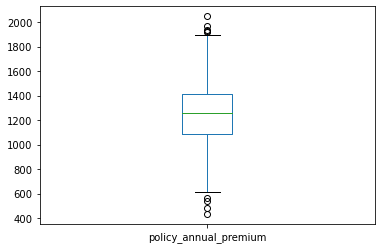

In [76]:
df['policy_annual_premium'].plot.box()

In [77]:
import numpy as np

##### ouliers checking

In [78]:
from scipy.stats import zscore
z = np.abs(zscore(df))
new_df = df[(z<3).all(axis = 1)]

In [79]:
df.shape

(1000, 34)

In [80]:
new_df.shape

(980, 34)

In [81]:
((1000-980)/1000)*100

2.0

In [82]:
df = new_df

In [83]:
df.shape

(980, 34)

### checking skewness

In [84]:
df.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                   0.082566
policy_csl                     0.094370
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                 0.128949
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221


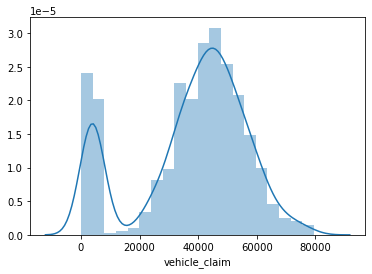

In [85]:
sns.distplot(df['vehicle_claim'],kde=True)

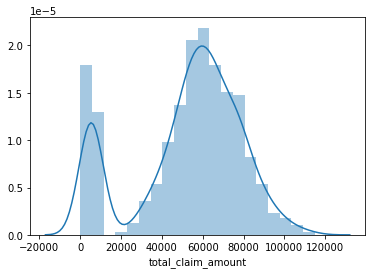

In [86]:
sns.distplot(df['total_claim_amount'],kde=True)

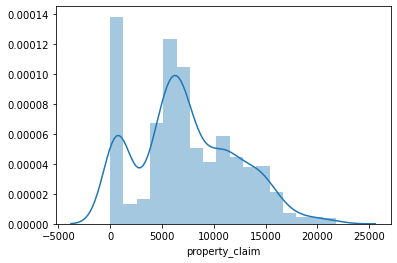

In [87]:
sns.distplot(df['property_claim'],kde=True)

In [88]:
df.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                   0.082566
policy_csl                     0.094370
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                 0.128949
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221


# splitting of the data

In [89]:
x = df.drop('fraud_reported',axis =1)#splitting the data
y = df['fraud_reported']

### scaling the value

In [91]:
from sklearn.preprocessing import StandardScaler# scaling the data using the standerd scaler
sc=StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [92]:
from imblearn.over_sampling import SMOTE#The data is imbalenced so we are using smote to balence the data
oversample = SMOTE(k_neighbors=4)
# transform the dataset
x, y = oversample.fit_resample(x, y)

In [93]:
x.shape

(1480, 33)

In [94]:
y.shape

(1480,)

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [101]:
import warnings
warnings.filterwarnings('ignore')

In [102]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS =0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr =LogisticRegression()
    lr.fit(x_train,y_train)
    predrf= lr.predict(x_test)
    accu = accuracy_score(y_test,predrf)
    if accu >maxAccu:
        maxAccu = accu
        maxRS =i
print('best accuray score is',maxAccu,"random_state is",i)

best accuray score is 0.6261261261261262 random_state is 199


In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=199)

In [104]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.5653153153153153
[[137  68]
 [125 114]]
              precision    recall  f1-score   support

           0       0.52      0.67      0.59       205
           1       0.63      0.48      0.54       239

    accuracy                           0.57       444
   macro avg       0.57      0.57      0.56       444
weighted avg       0.58      0.57      0.56       444



In [105]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

accuracy score :
0.8153153153153153
[[165  40]
 [ 42 197]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       205
           1       0.83      0.82      0.83       239

    accuracy                           0.82       444
   macro avg       0.81      0.81      0.81       444
weighted avg       0.82      0.82      0.82       444



In [106]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.5472972972972973
[[ 54 151]
 [ 50 189]]
              precision    recall  f1-score   support

           0       0.52      0.26      0.35       205
           1       0.56      0.79      0.65       239

    accuracy                           0.55       444
   macro avg       0.54      0.53      0.50       444
weighted avg       0.54      0.55      0.51       444



In [107]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.8806306306306306
[[183  22]
 [ 31 208]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       205
           1       0.90      0.87      0.89       239

    accuracy                           0.88       444
   macro avg       0.88      0.88      0.88       444
weighted avg       0.88      0.88      0.88       444



In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.6846846846846847
[[164  41]
 [ 99 140]]
              precision    recall  f1-score   support

           0       0.62      0.80      0.70       205
           1       0.77      0.59      0.67       239

    accuracy                           0.68       444
   macro avg       0.70      0.69      0.68       444
weighted avg       0.70      0.68      0.68       444



In [109]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred = ada.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.8558558558558559
[[178  27]
 [ 37 202]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       205
           1       0.88      0.85      0.86       239

    accuracy                           0.86       444
   macro avg       0.86      0.86      0.86       444
weighted avg       0.86      0.86      0.86       444



In [110]:
from sklearn.ensemble import GradientBoostingClassifier
gd =GradientBoostingClassifier() 
gd.fit(x_train,y_train)
pred = gd.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.8761261261261262
[[184  21]
 [ 34 205]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       205
           1       0.91      0.86      0.88       239

    accuracy                           0.88       444
   macro avg       0.88      0.88      0.88       444
weighted avg       0.88      0.88      0.88       444



In [111]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
prede = etc.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,prede))
print(confusion_matrix(y_test,prede))
print(classification_report(y_test,prede))

accuracy score :
0.8716216216216216
[[187  18]
 [ 39 200]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       205
           1       0.92      0.84      0.88       239

    accuracy                           0.87       444
   macro avg       0.87      0.87      0.87       444
weighted avg       0.88      0.87      0.87       444



In [112]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
pred = sgd.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.5
[[149  56]
 [166  73]]
              precision    recall  f1-score   support

           0       0.47      0.73      0.57       205
           1       0.57      0.31      0.40       239

    accuracy                           0.50       444
   macro avg       0.52      0.52      0.48       444
weighted avg       0.52      0.50      0.48       444



#### Cross validation

In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
scr = cross_val_score(lg,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.5743243243243243


In [115]:
scr = cross_val_score(dt,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.8371621621621621


In [116]:
scr = cross_val_score(sv,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.5337837837837839


In [117]:
scr = cross_val_score(rf,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.8608108108108109


In [118]:
scr = cross_val_score(knn,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.7094594594594594


In [119]:
scr = cross_val_score(ada,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.8378378378378379


In [120]:
scr = cross_val_score(gd,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.8655405405405405


In [121]:
scr = cross_val_score(etc,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.8648648648648647


In [122]:
scr = cross_val_score(sgd,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.5304054054054055


The difference between accuracy score and cross validation is less in extra tree classifier so i am hypertuning extra tree classifier

# Hyper tuning of Data

In [123]:
parameters={'criterion':['gini','entropy']}

In [124]:
gcv = GridSearchCV(etc,parameters, cv =5)

In [125]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})

In [126]:
gcv.best_params_

{'criterion': 'gini'}

In [127]:
final_mod =ExtraTreesClassifier(criterion='gini')
final_mod.fit(x_train,y_train)
predict= final_mod.predict(x_test)
accu = accuracy_score(y_test,predict)
print(accu)

0.8738738738738738


In [128]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

In [129]:
import matplotlib.pyplot as plt

AUC ROC Score: 0.8745076028166139


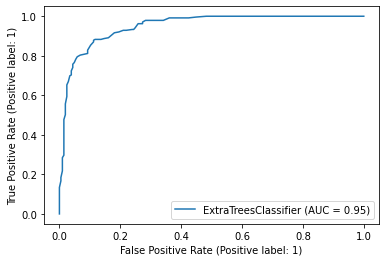

In [130]:
print("AUC ROC Score:",roc_auc_score(y_test,prede))
plot_roc_curve(final_mod,x_test,y_test)
plt.show()

we get AUc score of 0.96

## saving the model

In [133]:
import joblib
joblib.dump(final_mod,'insurencesetc.pkl')

['insurencesetc.pkl']

## Loading the saved model 

In [134]:
model = joblib.load('insurencesetc.pkl')

In [135]:
prediction = model.predict(x_test)

In [136]:
print(accuracy_score(y_test,prediction)*100)

87.38738738738738


In [137]:
prediction= pd.DataFrame(prediction)

In [138]:
prediction.to_csv('Result.csv')

In [139]:
prediction

,0
0,1
1,0
2,1
3,1
4,1
...,...
439,1
440,0
441,0
442,0


### conclusion